In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train=pd.read_csv('train_HK6lq50.csv')
df_test=pd.read_csv('test_wF0Ps6O.csv')

In [4]:
df_train.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


In [9]:
df_train.columns

Index(['id', 'program_id', 'program_type', 'program_duration', 'test_id',
       'test_type', 'difficulty_level', 'trainee_id', 'gender', 'education',
       'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped',
       'trainee_engagement_rating', 'is_pass'],
      dtype='object')

In [22]:
df_train.dtypes

id                            object
program_id                    object
program_type                  object
program_duration               int64
test_id                        int64
test_type                     object
difficulty_level              object
trainee_id                     int64
gender                        object
education                     object
city_tier                      int64
age                          float64
total_programs_enrolled        int64
is_handicapped                object
trainee_engagement_rating    float64
is_pass                        int64
dtype: object

In [32]:
Nan_columns=[df_train.columns[i] for i in range(len(df_train.dtypes)) if df_train.isna().any()[i]==True] 

#### trainee id column is quite irrelevant we will remove it as it formed from combination of program id + program type

In [34]:
df_train.describe()

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
count,73147.000000,73147.000000,73147.000000,73147.000000,45418.000000,73147.000000,73070.000000,73147.000000
mean,128.208676,91.079306,9843.079620,2.246845,36.494033,2.583934,2.395634,0.695408
std,6.889679,51.239048,5703.556093,1.011587,9.041119,1.240816,1.325288,0.460238
min,117.000000,0.000000,1.000000,1.000000,17.000000,1.000000,1.000000,0.000000
25%,121.000000,45.000000,5040.000000,1.000000,28.000000,2.000000,1.000000,0.000000
50%,131.000000,90.000000,9641.000000,2.000000,39.000000,2.000000,2.000000,1.000000
75%,134.000000,135.000000,14552.000000,3.000000,45.000000,3.000000,4.000000,1.000000
max,136.000000,187.000000,20098.000000,4.000000,63.000000,14.000000,5.000000,1.000000


No. of 1s and 0s in is_class target label
-----------------------------------------
1    0.695408
0    0.304592
Name: is_pass, dtype: float64


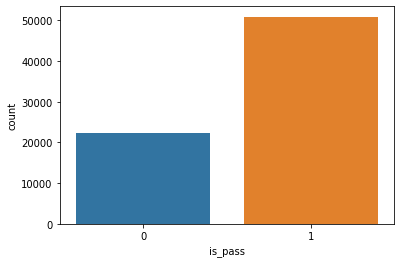

In [41]:
## is the Target(is_pass) is Imbalance? We will answer it here.
print('No. of 1s and 0s in is_class target label')
print('-----------------------------------------')
print(df_train.is_pass.value_counts(normalize=True))
##let's plot it
sns.countplot(df_train.is_pass)

The class is bit imbalance as we can 69% includes class 1 while 31% includes class 0.
We will try to handle this imbalance 

Trainee_engagement_rating(includes:-1,2,3,4 & 5)
-----------------------------------------------
1.0    25595
2.0    17234
4.0    13113
3.0    11553
5.0     5575
Name: trainee_engagement_rating, dtype: int64
Nan Values => 77


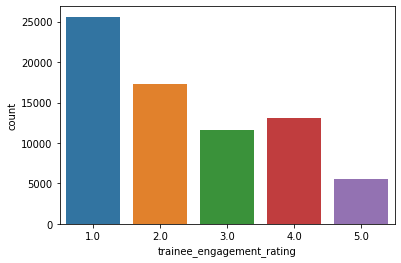

In [130]:
print('Trainee_engagement_rating(includes:-1,2,3,4 & 5)')
print('-----------------------------------------------')
print(df_train.trainee_engagement_rating.value_counts())
print('Nan Values','=>',len(df_train[df_train.trainee_engagement_rating.isna()]))
#let's plot
sns.countplot(df_train.trainee_engagement_rating)

categorical plot on the basis of pass with respect to the engagement ratings
----------------------------------------------------------------------------


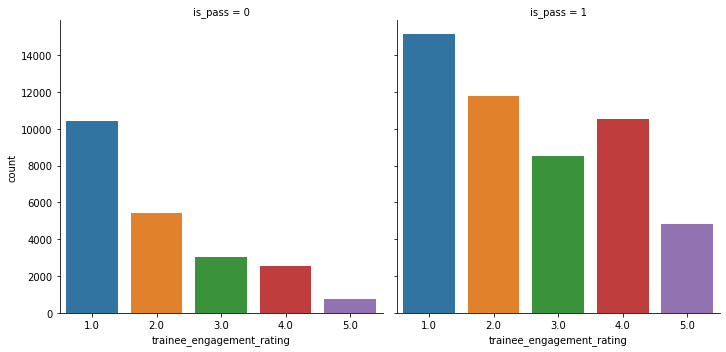

In [71]:
print('categorical plot on the basis of pass with respect to the engagement ratings')

print('----------------------------------------------------------------------------')

sns.catplot(x='trainee_engagement_rating',data=df_train[['trainee_engagement_rating','is_pass']],col='is_pass',kind='count')

In [78]:
print('percentage of total_program_enrolled(values represent count of no of programs enrolled)')
print('------------------------------------')
df_train.total_programs_enrolled.value_counts(normalize=True)*100

percentage of total_program_enrolled(values represent count of no of programs enrolled)
------------------------------------


2     55.419908
4     18.484695
3     10.461126
1     10.283402
5      2.330923
6      1.993246
8      0.410133
7      0.390993
9      0.108002
10     0.041013
12     0.038279
11     0.020507
14     0.017772
Name: total_programs_enrolled, dtype: float64

N    91.018087
Y     8.981913
Name: is_handicapped, dtype: float64
        in %
--------------------------------------------------


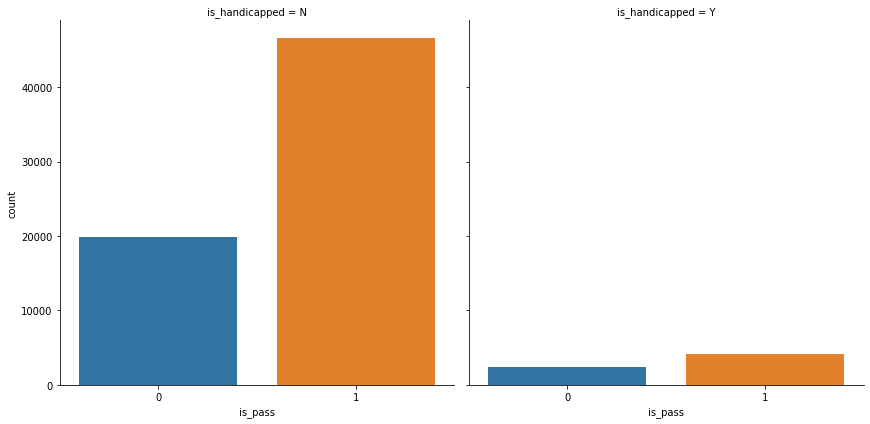

In [91]:
print(df_train.is_handicapped.value_counts(normalize=True)*100)
print('        in %')
print('--------------------------------------------------')
sns.catplot(x="is_pass",col='is_handicapped',data=df_train,height=6, kind="count")

In [107]:
print('City Tire')
print('---------')
print(df_train.city_tier.value_counts(normalize=True)*100)
print('--|--|--|--|--|--|--')
print('--------------------')
print('--|--|--|--|--|--|--')
print('Education')
print('---------')
print(df_train.education.value_counts(normalize=True)*100)

City Tire
---------
3    35.846993
1    31.633560
2    22.283894
4    10.235553
Name: city_tier, dtype: float64
--|--|--|--|--|--|--
--------------------
--|--|--|--|--|--|--
Education
---------
High School Diploma    46.988940
Matriculation          35.775903
Bachelors              15.832502
No Qualification        0.702695
Masters                 0.699960
Name: education, dtype: float64


(<seaborn.axisgrid.FacetGrid at 0x7f6b842a00d0>,)

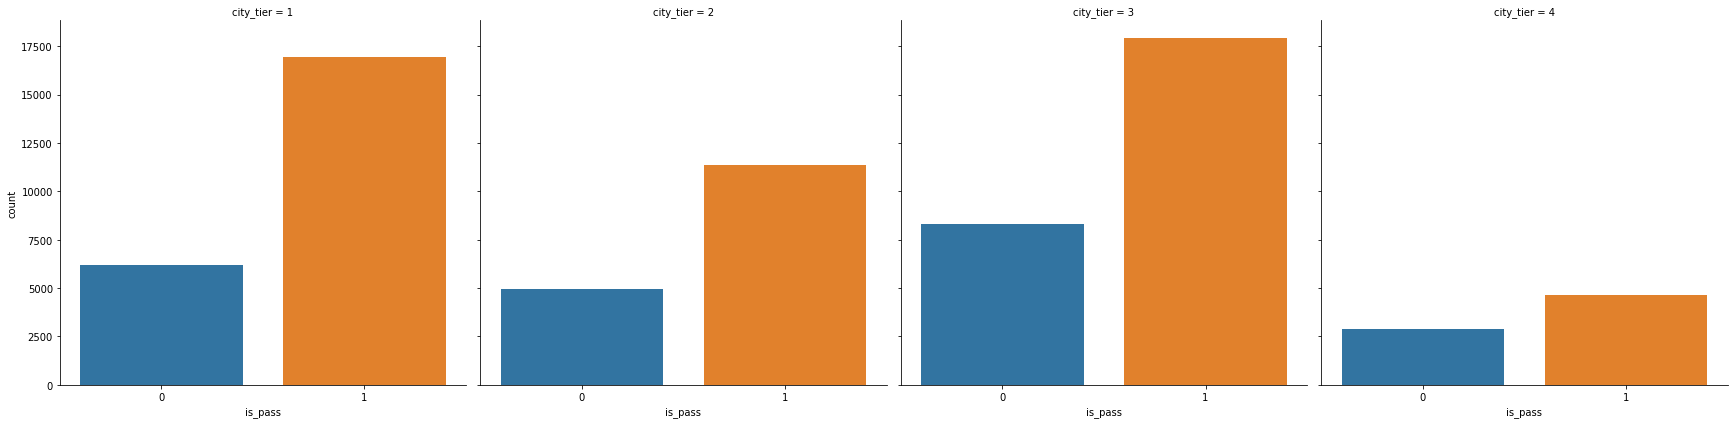

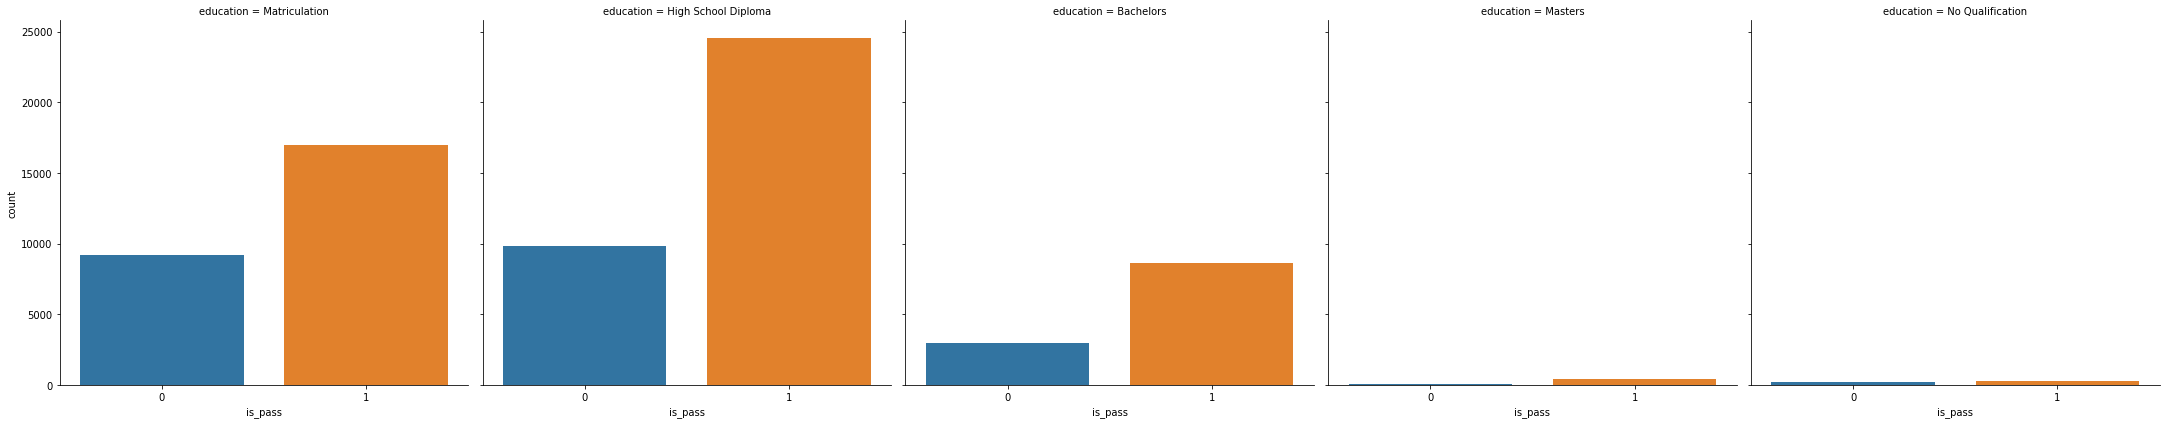

In [118]:
sns.catplot(x="is_pass",col='city_tier',data=df_train,height=6, kind="count")
sns.catplot(x="is_pass",col='education',data=df_train,height=6, kind="count"),

In [131]:
df_train.gender.value_counts()

M    39043
F    34104
Name: gender, dtype: int64

In [128]:
df_train[df_train.age.isna()].age
len(df_train[df_train.age.isna()].age)

27729

In [93]:
df_train.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


In [132]:
## fillnan values in age and trainee employement

In [137]:
corr=df_train.corr()

We could see that there is small correlation is present between is_pass and other features(excluding trainee id and testid)

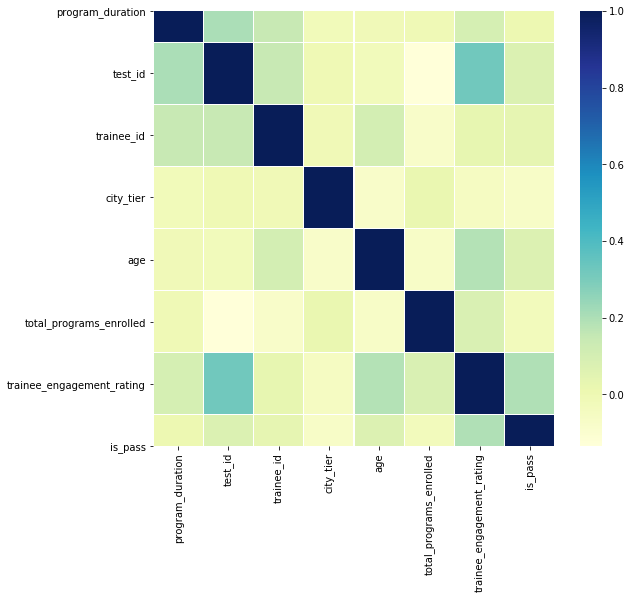

In [138]:
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corr, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 


What is the range of students who have passed?

In [181]:
x=df_train[['age','is_pass']]
print(x[x.age.isna()].is_pass.value_counts())
print('Nan age who has passed or failed count')
print('---------------------------------------')
print(x[x.is_pass==1][x.age.isna()])
print('19342 counts NaN age who are passed ')
print('----------------------------------------')
print(x[x.is_pass==0][x.age.isna()])
print('8387 counts NaN age who have failed')

1    19342
0     8387
Name: is_pass, dtype: int64
Nan age who has passed or failed count
---------------------------------------
       age  is_pass
3      NaN        1
8      NaN        1
10     NaN        1
11     NaN        1
12     NaN        1
...    ...      ...
73137  NaN        1
73140  NaN        1
73141  NaN        1
73142  NaN        1
73144  NaN        1

[19342 rows x 2 columns]
19342 counts NaN age who are passed 
----------------------------------------
       age  is_pass
25     NaN        0
53     NaN        0
54     NaN        0
56     NaN        0
82     NaN        0
...    ...      ...
73090  NaN        0
73095  NaN        0
73113  NaN        0
73118  NaN        0
73130  NaN        0

[8387 rows x 2 columns]
8387 counts NaN age who have failed 


/home/deba/anaconda3/envs/db/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/home/deba/anaconda3/envs/db/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


We cant determine now as the nanvalues between 1 and 0 is divided nearly equal

In [191]:
x=df_train[['age','is_pass','trainee_engagement_rating']]
x.isna().any()
print(x[x.trainee_engagement_rating.isna()][x.age.isna()].is_pass.value_counts())
x[x.trainee_engagement_rating.isna()].is_pass.value_counts()

1    17
0    14
Name: is_pass, dtype: int64


/home/deba/anaconda3/envs/db/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


0    39
1    38
Name: is_pass, dtype: int64

We filled the age with 27 by comparing with the education

In [207]:
print(df_train[['education','age']][df_train.age.isna()].education.value_counts())
print(df_train[['education','age']][df_train.education=='High School Diploma'].age.value_counts())
df_train.age.fillna(27.0,inplace=True)

High School Diploma    14337
Matriculation           9652
Bachelors               3431
No Qualification         241
Masters                   68
Name: education, dtype: int64
27.0    1593
28.0    1545
45.0    1512
29.0    1422
44.0    1399
46.0    1202
43.0    1179
26.0    1172
30.0    1106
25.0     933
31.0     881
42.0     821
47.0     763
24.0     675
41.0     519
32.0     479
48.0     391
23.0     367
33.0     280
49.0     264
40.0     239
22.0     196
34.0     146
21.0     132
39.0     127
50.0     111
35.0      95
37.0      61
38.0      61
51.0      59
57.0      48
56.0      46
36.0      45
20.0      40
19.0      24
52.0      23
58.0      20
18.0      16
17.0      15
53.0      12
55.0       6
54.0       5
59.0       4
Name: age, dtype: int64


In [211]:
x=df_train[['age','is_pass','trainee_engagement_rating']]
x[x.trainee_engagement_rating.isna()][['age','is_pass']]

,age,is_pass
623,43.0,0
990,43.0,0
3051,27.0,1
3463,45.0,0
4320,26.0,1
...,...,...
67195,42.0,0
68908,27.0,0
69068,22.0,1
71699,33.0,0


/home/deba/anaconda3/envs/db/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/deba/anaconda3/envs/db/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


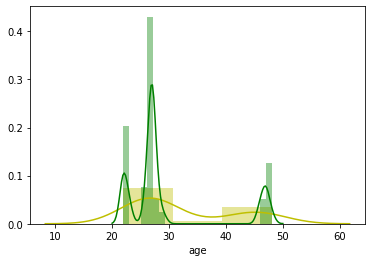

In [219]:
sns.distplot(x[x.trainee_engagement_rating.isna()][['age','is_pass']][x.is_pass==0].age,color='y')
sns.distplot(x[x.trainee_engagement_rating.isna()][['age','is_pass']][x.is_pass==1].age,color='g')

In [229]:
x[x.age>=25][x.age<30][x.is_pass==1].trainee_engagement_rating.value_counts()

/home/deba/anaconda3/envs/db/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


1.0    8581
2.0    6659
4.0    6031
3.0    4842
5.0    2170
Name: trainee_engagement_rating, dtype: int64

In [230]:
df_train['trainee_engagement_rating'].fillna(1,inplace=True)

In [231]:
df_train.isna().any()

id                           False
program_id                   False
program_type                 False
program_duration             False
test_id                      False
test_type                    False
difficulty_level             False
trainee_id                   False
gender                       False
education                    False
city_tier                    False
age                          False
total_programs_enrolled      False
is_handicapped               False
trainee_engagement_rating    False
is_pass                      False
dtype: bool

In [235]:
df_train[['program_id','is_pass']]

,program_id,is_pass
0,Y_1,0
1,T_1,1
2,Z_2,1
3,T_2,1
4,V_3,1
...,...,...
73142,Z_3,1
73143,T_2,1
73144,Y_2,1
73145,V_3,1


In [233]:
df_train.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,27.0,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


In [ ]:
##test 

In [236]:
df=df_train.drop(columns=['id','program_id','program_type','test_id','trainee_id','id'])

In [241]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

In [245]:
##one hot enconding
trial=df.select_dtypes(include='object')
trial=enc.fit_transform(trial)

In [246]:
trial

<73147x15 sparse matrix of type '<class 'numpy.float64'>'
	with 365735 stored elements in Compressed Sparse Row format>

In [250]:
enc.get_feature_names()

array(['x0_offline', 'x0_online', 'x1_easy', 'x1_hard', 'x1_intermediate',
       'x1_vary hard', 'x2_F', 'x2_M', 'x3_Bachelors',
       'x3_High School Diploma', 'x3_Masters', 'x3_Matriculation',
       'x3_No Qualification', 'x4_N', 'x4_Y'], dtype=object)

In [254]:
trial.toarray().shape

(73147, 15)

In [273]:
#trial=pd.DataFrame(trial.toarray(),columns=enc.get_feature_names())

In [258]:
#df.drop(columns=)

,program_duration,test_type,difficulty_level,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,136,offline,intermediate,M,Matriculation,3,24.0,5,N,1.0,0
1,131,offline,easy,F,High School Diploma,4,26.0,2,N,3.0,1
2,120,online,easy,M,Matriculation,1,40.0,1,N,2.0,1
3,117,offline,easy,F,Matriculation,3,27.0,4,N,1.0,1
4,131,offline,intermediate,F,High School Diploma,1,42.0,2,N,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...
73142,130,offline,easy,F,High School Diploma,3,27.0,1,N,2.0,1
73143,117,online,easy,F,High School Diploma,2,45.0,2,N,2.0,1
73144,120,online,easy,M,Matriculation,2,27.0,3,N,4.0,1
73145,131,offline,intermediate,M,High School Diploma,3,27.0,2,N,2.0,1


In [269]:
df = pd.concat([df,trial], axis=1)


In [284]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [274]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns=['is_pass']),df.is_pass,test_size=0.33,random_state=42)

In [278]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [282]:
logi=LogisticRegression()
logi.fit(X_train,y_train)
pred=logi.predict(X_test)

/home/deba/anaconda3/envs/db/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Very Bad Score! We have to preprocess it more so as to have good ROC_AUC score

In [286]:
metrics.accuracy_score(y_test,pred)
metrics.roc_auc_score(y_test,pred)b

0.5462586339499933